# Explorando o DataSet WESAD (Wearable Stress and Affect Detection)

Este notebook contém análises exploratórias dos dados disponibilizados pelo DataSet. Para exploração será utilizado o sujeito S2, abaixo temos as informações pessoais do sujeito:


*   Idade: 27
*   Altura: 1,75
*   Peso: 80kg
*   Sexo:  Masculino
*   Mão Dominante: Direita
*   Item da lista




In [ ]:
import sys
print(sys.version)

3.6.9 (default, Jul 17 2020, 12:50:27) 
[GCC 8.4.0]


In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pickle.HIGHEST_PROTOCOL

4

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#carregando o dataset
data_set = '/content/drive/My Drive/Colab Notebooks/dataset wesad/'
s2_path = data_set + 'S2.pkl'
#modificação necessária pois os dados estavam em py2 e o ambiente usa py3
with open(s2_path, 'rb') as file:
    s2_data = pickle.load(file, encoding='latin1')

# Identificando os dados



In [ ]:
count=len(s2_data['label'])
print('Sujeito', s2_data['subject'])
print('labels array', (s2_data['label']))
print('sinal', s2_data['signal'])
print('len(labels array)=',count)

Sujeito S2
labels array [0 0 0 ... 0 0 0]
sinal {'chest': {'ACC': array([[ 0.95539999, -0.222     , -0.55799997],
       [ 0.92579997, -0.2216    , -0.55379999],
       [ 0.90820003, -0.21960002, -0.53920001],
       ...,
       [ 0.87179995, -0.12379998, -0.30419999],
       [ 0.87300003, -0.12339997, -0.30260003],
       [ 0.87020004, -0.12199998, -0.30220002]]), 'ECG': array([[ 0.02142334],
       [ 0.02032471],
       [ 0.01652527],
       ...,
       [-0.00544739],
       [ 0.00013733],
       [ 0.0040741 ]]), 'EMG': array([[-0.00444031],
       [ 0.00434875],
       [ 0.00517273],
       ...,
       [-0.01716614],
       [-0.02897644],
       [-0.02357483]]), 'EDA': array([[5.25054932],
       [5.26733398],
       [5.24330139],
       ...,
       [0.36048889],
       [0.36582947],
       [0.365448  ]]), 'Temp': array([[30.120758],
       [30.129517],
       [30.138214],
       ...,
       [31.459229],
       [31.484283],
       [31.456268]], dtype=float32), 'Resp': array([[-1.148

A seção "sinal" identifica os pontos de dados registrados dos dois dispositivos usados ​​no estudo e a "label" identifica qual cenário o sujeito estava experimentando quando os dados foram registrados.

In [ ]:
c_ax=s2_data['signal']['chest']['ACC'][0:,0]#[baseline_to_plot]
c_ay=s2_data['signal']['chest']['ACC'][0:,1]#[baseline_to_plot]#[0:100] # hundred values
c_az=s2_data['signal']['chest']['ACC'][0:,2]#[baseline_to_plot]
c_ecg=s2_data['signal']['chest']['ECG'][:,0]#[baseline_to_plot]
c_emg=s2_data['signal']['chest']['EMG'][:,0]#[baseline_to_plot]
c_eda=s2_data['signal']['chest']['EDA'][:,0]#[baseline_to_plot]
c_temp=s2_data['signal']['chest']['Temp'][:,0]#[baseline_to_plot]
c_resp=s2_data['signal']['chest']['Resp'][:,0]#[baseline_to_plot]
w_ax=s2_data['signal']['wrist']['ACC'][0:,0]#[stress_to_plot]
w_ay=s2_data['signal']['wrist']['ACC'][0:,1]#[stress_to_plot]
w_az=s2_data['signal']['wrist']['ACC'][0:,2]#[stress_to_plot]
w_bvp=s2_data['signal']['wrist']['BVP'][:,0]#[stress_to_plot]
w_eda=s2_data['signal']['wrist']['EDA'][:,0]#[stress_to_plot]
w_temp=s2_data['signal']['wrist']['TEMP'][:,0]#[stress_to_plot]
w_label=s2_data['label']

# Rótulos oferecidos pelo Dataset

baseline_indices 800800
stress_indices 430500
amusement_indices 253400
meditation_indices 537599


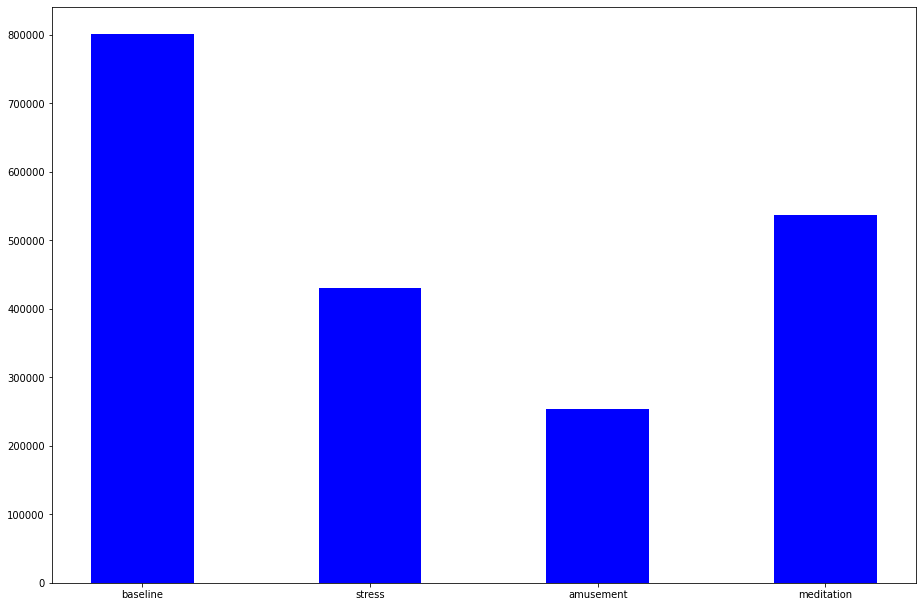

In [ ]:
baseline_indices = np.nonzero(s2_data['label']==1)[0]
stress_indices = np.nonzero(s2_data['label']==2)[0]
amusement_indices = np.nonzero(s2_data['label']==3)[0]
meditation_indices = np.nonzero(s2_data['label']==4)[0]

print("baseline_indices", len(baseline_indices))
print("stress_indices", len(stress_indices))
print("amusement_indices", len(amusement_indices))
print("meditation_indices", len(meditation_indices))

fig = plt.figure()
ax = fig.add_axes([1,1,2,2])
langs = ["baseline", "stress", "amusement","meditation"]
y_ax = [len(baseline_indices),len(stress_indices),len(amusement_indices),len(meditation_indices)]
ax.bar(langs,y_ax,color = 'b', width = 0.45)
fig.savefig('f1.png')
plt.show()


# Contagem de dados por dispositivos

c_ax 4255300
c_ay 4255300
c_az 4255300
c_ecg 4255300
c_emg 4255300
c_eda 4255300
c_temp 4255300
c_resp 4255300
w_ax 194528
w_ay 194528
w_az 194528
w_bvp 389056
w_eda 24316
w_temp 24316
[0 0 0 ... 0 0 0] 4255300
Min label value 0 Max label value 7


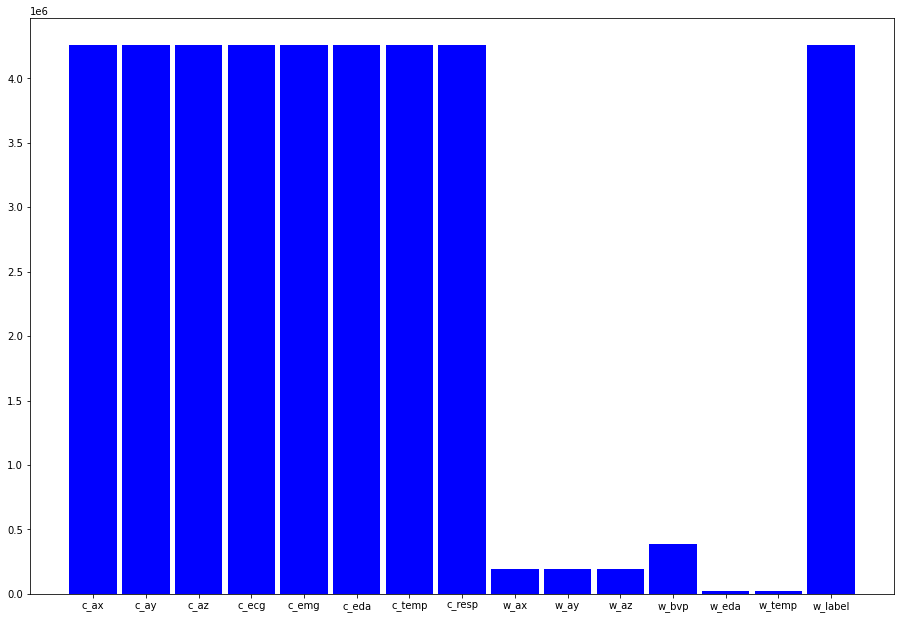

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline
print("c_ax",len(c_ax))
print("c_ay",len(c_ay))
print("c_az",len(c_az))
print("c_ecg",len(c_ecg))
print("c_emg",len(c_emg))
print("c_eda",len(c_eda))
print("c_temp",len(c_temp))
print("c_resp",len(c_resp))
print("w_ax",len(w_ax))
print("w_ay",len(w_ay))
print("w_az",len(w_az))
print("w_bvp",len(w_bvp))
print("w_eda",len(w_eda))
print("w_temp",len(w_temp))
print(w_label, len(w_label))
print("Min label value", min(w_label), "Max label value",max(w_label))

fig = plt.figure()
ax = fig.add_axes([1,1,2,2])
langs = ["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_ax","w_ay","w_az","w_bvp","w_eda","w_temp","w_label"]
y_ax = [len(c_ax),len(c_ay),len(c_az),len(c_ecg),len(c_emg),len(c_eda),len(c_temp),len(c_resp),len(w_ax),len(w_ay),len(w_az),len(w_bvp),len(w_eda),len(w_temp),len(w_label)]
ax.bar(langs,y_ax,color = 'b', width = 0.90)

plt.show()
plt.savefig('f2.png',dpi=100)

# Convertendo dicionário de pickle em quadro de dados do Pandas

In [ ]:
numpy_data1=np.array([c_ax, c_ay, c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label])
numpy_data1=numpy_data1.T
df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_label"]) 

print("data frame combinado")


data frame combinado


# Calculando Outliers

In [ ]:
print("shape",df.shape)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print("IQR is\n", IQR)

shape (4255300, 9)
IQR is
 c_ax       0.271200
c_ay       0.054000
c_az       0.507400
c_ecg      0.112335
c_emg      0.012314
c_eda      0.746918
c_temp     1.240173
c_resp     3.100586
w_label    2.000000
dtype: float64


# Removendo Outliers

In [ ]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)


(2100456, 9)


In [ ]:
base_df = df_out.loc[(df_out['w_label'] == 0)]
stress_df = df_out.loc[(df_out['w_label'] == 1)]
amus_df = df_out.loc[(df_out['w_label'] == 2)]
medi_df = df_out.loc[(df_out['w_label'] == 3)]

# Descrevendo dados

In [ ]:
(df_out.describe())

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
count,2.100456e+06,2.100456e+06,2.100456e+06,2.100456e+06,2.100456e+06,2.100456e+06,2.100456e+06,2.100456e+06,2.100456e+06
mean,8.317685e-01,-1.233951e-01,-3.003224e-01,-1.787775e-02,-1.975948e-03,1.091733e+00,3.144793e+01,-2.909448e-02,1.164535e+00
std,1.124673e-01,2.816034e-02,2.486282e-01,8.312552e-02,8.932746e-03,4.379497e-01,5.746423e-01,2.247824e+00,1.510026e+00
min,3.218000e-01,-2.308000e-01,-9.208000e-01,-2.364807e-01,-2.677917e-02,2.784729e-01,2.871490e+01,-6.132507e+00,0.000000e+00
25%,8.298000e-01,-1.418000e-01,-4.118000e-01,-6.573486e-02,-7.736206e-03,7.759094e-01,3.109299e+01,-1.637268e+00,0.000000e+00
50%,8.786000e-01,-1.258000e-01,-2.696000e-01,2.655029e-03,-1.419067e-03,1.082993e+00,3.136053e+01,-2.746582e-01,0.000000e+00
75%,9.018000e-01,-1.078000e-01,-1.558000e-01,3.240967e-02,3.936768e-03,1.254272e+00,3.186548e+01,1.618958e+00,2.000000e+00
max,1.298600e+00,-1.480001e-02,5.502000e-01,2.128601e-01,2.243042e-02,2.666855e+00,3.367465e+01,6.269836e+00,4.000000e+00


In [ ]:
(df_out.head())

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
393691,0.6430,-0.0600,-0.6966,-0.044998,-0.008011,2.652359,28.717804,-0.965881,1.0
394476,0.6408,-0.0638,-0.6892,-0.176926,-0.014557,2.648163,28.716339,1.914978,1.0
395154,0.6394,-0.0602,-0.6918,0.052231,0.009659,2.662659,28.719208,-1.673889,1.0
396635,0.6354,-0.0684,-0.6998,-0.138611,0.000000,2.662277,28.716339,2.491760,1.0
402178,0.6392,-0.0626,-0.6972,0.045822,-0.006775,2.648163,28.820953,2.105713,1.0


In [ ]:
base_df.describe()

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
count,1.230433e+06,1.230433e+06,1.230433e+06,1.230433e+06,1.230433e+06,1.230433e+06,1.230433e+06,1.230433e+06,1230433.0
mean,8.650659e-01,-1.184192e-01,-2.358937e-01,-1.777447e-02,-1.918047e-03,1.072221e+00,3.136766e+01,2.394844e-03,0.0
std,6.450042e-02,3.159451e-02,2.058045e-01,8.352993e-02,9.542821e-03,4.045076e-01,5.779942e-01,2.366430e+00,0.0
min,3.302000e-01,-2.308000e-01,-9.096000e-01,-2.364807e-01,-2.677917e-02,2.784729e-01,2.937723e+01,-6.132507e+00,0.0
25%,8.442000e-01,-1.374000e-01,-3.698000e-01,-6.706238e-02,-8.193970e-03,7.656097e-01,3.093903e+01,-1.763916e+00,0.0
50%,8.830000e-01,-1.162000e-01,-2.502000e-01,1.693726e-03,-1.510620e-03,1.108932e+00,3.132962e+01,-2.380371e-01,0.0
75%,9.026000e-01,-1.022000e-01,-1.356000e-01,3.236389e-02,4.577637e-03,1.225281e+00,3.184772e+01,1.803589e+00,0.0
max,1.298600e+00,-1.480001e-02,5.502000e-01,2.128601e-01,2.243042e-02,2.666855e+00,3.312662e+01,6.269836e+00,0.0


In [ ]:
stress_df.describe()

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
count,53659.000000,53659.000000,53659.000000,53659.000000,53659.000000,53659.000000,53659.000000,53659.000000,53659.0
mean,0.644033,-0.082243,-0.682666,-0.014250,-0.001975,1.128781,31.701952,0.290094,1.0
std,0.055506,0.026508,0.112778,0.106077,0.007993,0.081005,1.318731,1.941966,0.0
min,0.503800,-0.230800,-0.778200,-0.236435,-0.026779,1.016235,28.714905,-6.127930,1.0
25%,0.626800,-0.095000,-0.713000,-0.111443,-0.006821,1.104736,30.516602,-1.298523,1.0
50%,0.630200,-0.088200,-0.708400,0.027649,-0.001419,1.128387,31.875854,0.221252,1.0
75%,0.636200,-0.061800,-0.701400,0.057541,0.003159,1.140976,32.891510,1.899719,1.0
max,1.297800,-0.014800,0.547400,0.212814,0.022430,2.662659,33.674652,6.266785,1.0


In [ ]:
medi_df.describe() 

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
count,239191.000000,239191.000000,239191.000000,239191.000000,239191.000000,239191.000000,239191.000000,239191.000000,239191.0
mean,0.908246,-0.146495,-0.096748,-0.015975,-0.002201,0.737416,32.192064,0.059902,3.0
std,0.006777,0.008612,0.051844,0.066794,0.008332,0.087991,0.311224,2.026582,0.0
min,0.839800,-0.182800,-0.277400,-0.235794,-0.026779,0.445175,31.501953,-6.132507,3.0
25%,0.902600,-0.150600,-0.165200,-0.040375,-0.007507,0.687027,31.945496,-1.695251,3.0
50%,0.910200,-0.146200,-0.071000,0.000778,-0.001694,0.744247,32.144348,-0.416565,3.0
75%,0.912800,-0.143000,-0.058600,0.018997,0.003479,0.798798,32.380981,1.899719,3.0
max,0.983200,-0.015000,0.022200,0.212814,0.022430,0.994110,33.055939,6.269836,3.0


In [ ]:
base_mean = np.mean(s2_data['signal']['chest']['EDA'][baseline_indices])
stress_mean = np.mean(s2_data['signal']['chest']['EDA'][stress_indices])

print('base média:\t', base_mean, '\nstress media:\t', stress_mean, '\n diferença:\t', abs(base_mean - stress_mean))
print('\n-')


base_median = np.median(s2_data['signal']['chest']['EMG'][baseline_indices])
stress_median = np.median(s2_data['signal']['chest']['EMG'][stress_indices])

print('base mediana:\t', base_median , '\nstress mediana:\t', stress_median, '\ndiferença:\t', abs(base_median  - stress_median))
print('\n-')

base_min = np.min(s2_data['signal']['chest']['EDA'][baseline_indices])
stress_min = np.min(s2_data['signal']['chest']['EDA'][stress_indices])

print('base minimo:\t', base_min, '\nstress minimo:\t', stress_min, '\ndiferença:\t', abs(base_min - stress_min))
print('\n-')

base_max = np.max(s2_data['signal']['chest']['EDA'][baseline_indices])
stress_max = np.max(s2_data['signal']['chest']['EDA'][stress_indices])

print('base maximo:\t', base_max , '\nstress maximo:\t', stress_max, '\ndiferença:\t', abs(base_max  - stress_max))
print('\n-')

base média:	 2.0565166763968756 
stress media:	 1.796925323876216 
 diferença:	 0.2595913525206597

-
base mediana:	 -0.0019683837890625 
stress mediana:	 -0.0017852783203125 
diferença:	 0.00018310546875

-
base minimo:	 0.913238525390625 
stress minimo:	 0.968170166015625 
diferença:	 0.054931640625

-
base maximo:	 5.7567596435546875 
stress maximo:	 3.4427642822265625 
diferença:	 2.313995361328125

-
